In [1]:
# Setting up the necessities
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

#Setting the dataset root
data_dir = r"D:\My Stuff\Projects\Medicinal Plants\Dataset"

#Printing classes
print(os.listdir(data_dir))
classes = os.listdir(data_dir)
print(f"Classes in the dataset are: {len(classes)}")

['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)']
Classes in the dataset are: 16


torch.Size([3, 227, 227]) 0
Label:  Alpinia Galanga (Rasna) (0)
Label:  Hibiscus Rosa-sinensis (10)


1075

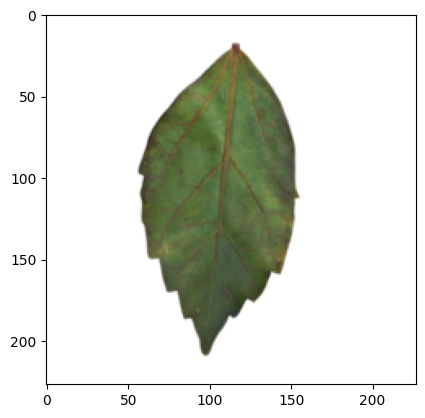

In [6]:
# Data Preprocessing : 

# define transforms
transform = transforms.Compose([
        transforms.Resize((227,227)),
        transforms.ToTensor()
        ])

# ImageFolder used since data / classes is organized in the form of folders
dataset = ImageFolder(data_dir, transform=transform)
dataset

img,label = dataset[0]
print(img.shape,label)

def show_example(img,label):
  print('Label: ', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

show_example(*dataset[0])

# show_example(*dataset[690])

random_seed = 42
torch.manual_seed(random_seed)

len(dataset)

In [11]:
val_size = 200
test_size = 200
train_size = len(dataset)-val_size-test_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size,val_size, test_size])
len(train_ds),len(val_ds),len(test_ds)

from torch.utils.data.dataloader import DataLoader
batch_size = 32
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
val_dl = DataLoader(val_ds,batch_size=batch_size)

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

num_classes = 16
num_epochs = 10 #ideally 30 or 50
learning_rate = 0.001

model = VGG16(num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)


# Train the model
total_step = len(train_dl)

total_step = len(train_dl)

In [5]:
# Tuned the model, Now training the model

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dl):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_dl:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs

        print('Accuracy of the network on the {} validation images: {} %'.format(200, 100 * correct / total))
# save the trained model
torch.save(model.state_dict(),'mlmodel.pth')

Epoch [1/10], Step [22/22], Loss: 2.6534
Accuracy of the network on the 200 validation images: 28.0 %
Epoch [2/10], Step [22/22], Loss: 2.1423
Accuracy of the network on the 200 validation images: 45.5 %
Epoch [3/10], Step [22/22], Loss: 1.7343
Accuracy of the network on the 200 validation images: 51.5 %
Epoch [4/10], Step [22/22], Loss: 1.4087
Accuracy of the network on the 200 validation images: 59.5 %
Epoch [5/10], Step [22/22], Loss: 0.3632
Accuracy of the network on the 200 validation images: 71.5 %
Epoch [6/10], Step [22/22], Loss: 0.3179
Accuracy of the network on the 200 validation images: 76.5 %
Epoch [7/10], Step [22/22], Loss: 1.3261
Accuracy of the network on the 200 validation images: 72.0 %
Epoch [8/10], Step [22/22], Loss: 0.1132
Accuracy of the network on the 200 validation images: 82.0 %
Epoch [9/10], Step [22/22], Loss: 0.4597
Accuracy of the network on the 200 validation images: 85.5 %
Epoch [10/10], Step [22/22], Loss: 0.0935
Accuracy of the network on the 200 valid

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Define the transformation to be applied to the input image
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor()
])

# Load the trained model
model = VGG16(num_classes=16)  # Define YourModelClass based on your model architecture
model.load_state_dict(torch.load('mlmodel.pth'))
model.eval()  # Set the model to evaluation mode

# Load and preprocess the input image
input_image_path = 'D:/My Stuff/College/SIH/Working correct/AI-S-004.jpg'  # Change to the path of your input image
input_image = Image.open(input_image_path)
input_tensor = transform(input_image)
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    predicted_class = classes[predicted.item()]  # Get the predicted class index

# Print the predicted class
print('Predicted Class:', predicted_class)


NameError: name 'VGG16' is not defined

In [ ]:
# test_dl = DataLoader(test_ds,batch_size=batch_size)

# import matplotlib.pyplot as plt
# import numpy as np

# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in test_dl:
#         images = images.to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#         # Visualize the images with their predicted labels
#         for i in range(images.size(0)):
#             image = images[i].cpu().numpy()
#             label = labels[i].cpu().item()
#             prediction = predicted[i].cpu().item()

#             # Convert the image from tensor to numpy array and unnormalize it if needed
#             # You may need to adjust the mean and std values if you used data normalization during training
#             image = np.transpose(image, (1, 2, 0))  # (C, H, W) -> (H, W, C)

#             # Display the image and its true and predictedmi labels
#             plt.imshow(image)
#             plt.title(f'True Label: {dataset.classes[label]}, Predicted Label: {dataset.classes[prediction]}')
#             plt.show()


#     print('Accuracy of the network on the {} test images: {} %'.format(200, 100 * correct / total))
